# Week 6: Colab Experiment

# I. Introduction
In this exercise, we apply dimension reduction methods and clustering algorithms to single-cell sequencing data.

# II. Methods
### Write Something

In [1]:

from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Mounted at /content/drive


In [3]:
# Load the data and normalize the single-cell sequencing counts by total counts and log transform the counts
tasic2018 = np.load("/content/drive/MyDrive/ML_Course/HW5/cell_data.npz")

# data normalization
librarySizes = tasic2018['counts'].sum(axis=1)    # Compute library sizes
CPM = tasic2018['counts'] / librarySizes.reshape(-1,1) * 1e+6              # Library size normalisation
logCPM = np.log2(CPM + 1) # Log-transformation

In [4]:
# TODO:
# Implement PCA
# store your result in X or change the plt.scatter
# X = PCA_RESULT

pca = PCA(n_components=2, random_state=87)
pca.fit(logCPM)
X = pca.transform(logCPM)
# print(logCPM.shape)
# print(X.shape)


In [5]:
# TODO
# Implement K-Means

k_grid = range(2,11,1)
score = []

for k in k_grid:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=87)
    cluster_labels = kmeans.fit_predict(X)
    # print('k: ', k, 'cluster_labels: ', cluster_labels, '\n')
    silhouette_avg = silhouette_score(X, cluster_labels)
    # print('silhouette_avg: ', silhouette_avg, '\n')
    score.append(silhouette_avg)
# print('score: ', score, '\n')

## III. Results

Here we show the scatter plot of the top 2 PCs. We also show the silhouette score with respect to the number of k-means clusters.

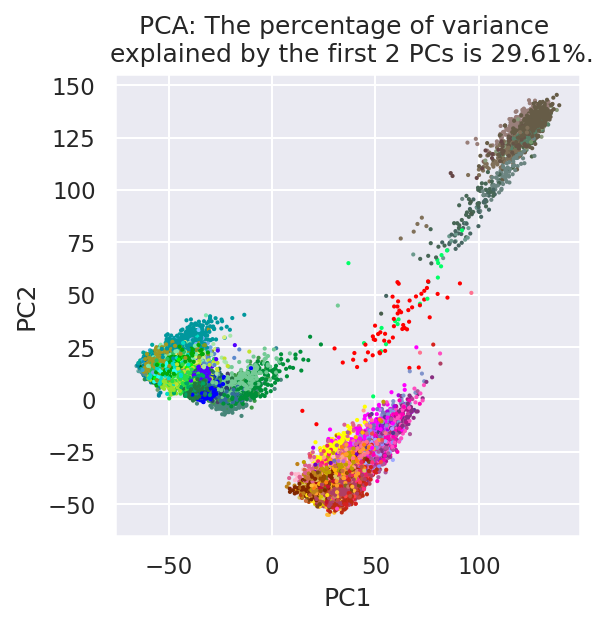

In [6]:
# Principal component analysis scatter plot

plt.figure(figsize=(4,4), dpi=150)
plt.scatter(X[:,0], X[:,1], s=1, color=tasic2018['clusterColors'][tasic2018['clusters']])
plt.title(f"PCA: The percentage of variance \n explained by the first 2 PCs is {round(sum(pca.explained_variance_ratio_) * 100 , 2)}%.")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

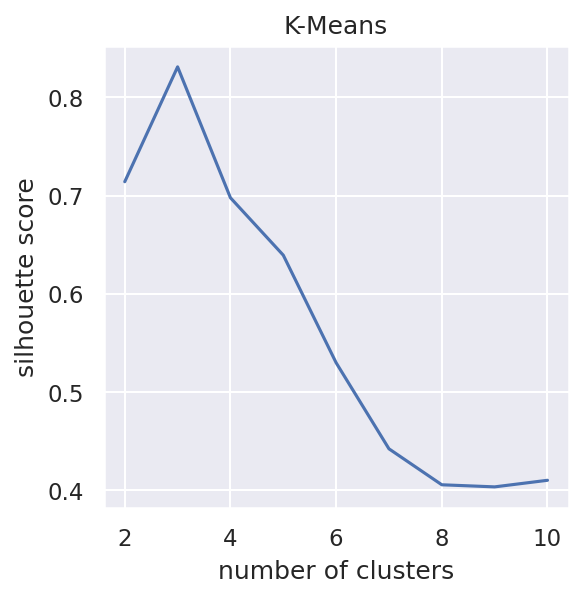

In [7]:
# k-means clustering performance
plt.figure(figsize=(4,4), dpi=150)
plt.plot(k_grid, score)
plt.title('K-Means')
plt.xlabel('number of clusters')
plt.ylabel('silhouette score')
plt.show()

# IV. Conclusion and Discussion

### Please observe the plot image and write down your findings.

In [8]:
#As you can see, k=3 is the best parameter of number of clusters, which has the highest silhouette score of 0.83.
#Hence, it's crucial to choose k=3 in the K-Mean Algorithm, which will drive the Algorithm to have the best performance.
#Besides, the silhouette score decreases as the number of clusters increase.
#In conclusion, we can assume that this dataset is full of 3-cluster data.